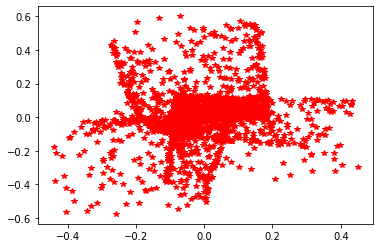

array([[-0.10016012,  0.00867272],
       [-0.00253494, -0.43267138]])

In [2]:
import numpy as np
import matplotlib.pyplot as plt


nlinear_x0 = np.empty((2000,2))
nlinear_x1 = np.empty((2000,2))

with open("nonlinear_vectorfield_data_x0.txt") as f:
    line = f.readline()
    cnt = 0
    while line:
        x01, x02 = str(line).split(" ")
        nlinear_x0[cnt, 0] = float(x01)
        nlinear_x0[cnt, 1] = float(x02)
        cnt = cnt + 1
        line = f.readline()
        
with open("nonlinear_vectorfield_data_x1.txt") as f:
    line = f.readline()
    cnt = 0
    while line:
        x11, x12 = str(line).split(" ")
        nlinear_x1[cnt, 0] = float(x11)
        nlinear_x1[cnt, 1] = float(x12)
        cnt = cnt + 1
        line = f.readline()
        
xdiff=nlinear_x1-nlinear_x0
plt.plot(xdiff[:,0], xdiff[:,1], "*r")
plt.show()

#choose delta_t=0.1

vhat=xdiff/0.1
A = np.linalg.lstsq(nlinear_x0, vhat, rcond=None)[0]

A

In [7]:
from scipy.integrate import solve_ivp

def right_handside(t, y): return A@y

results = np.empty((2000,2))
for i in range(2000):
    solution = solve_ivp(right_handside, [0, 0.1], nlinear_x0[i,:], t_eval = [0.1]).y
    results[i, 0] = solution[0]
    results[i, 1] = solution[1]

a=sum((results - nlinear_x1)**2)

mse=a[0]+a[1]
mse

74.58375831864166